In [2]:
import pandas as pd
import numpy as np

In [3]:
weather = pd.read_csv("weatherAUS.csv")
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
features=["MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed3pm","Humidity9am","Humidity3pm"
,"Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm"]

In [5]:
#cleaning (dropping the rows which have missing values)
weather = weather.dropna(subset=features)

In [6]:
data = weather[features].copy()
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6049,17.9,35.2,0.0,12.0,12.3,48.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
6052,19.4,37.6,0.0,10.8,10.6,46.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
6054,24.2,41.0,0.0,11.2,8.4,35.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3
142299,21.2,32.6,0.0,7.6,8.6,37.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0
142300,20.7,32.8,0.0,5.6,11.0,33.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1
142301,19.5,31.8,0.0,6.2,10.6,26.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2


# Scaling-Mean normalisation(All values brought under the range 0-10)

In [7]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [8]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000,58265.000000
mean,5.732630,5.095662,1.092558,1.603180,5.775280,3.470882,3.319742,6.961089,5.473847,6.533891,6.501922,5.782191,5.331297,5.238298,5.016722
std,1.527536,1.426491,0.305220,0.409026,2.337561,1.048522,1.014899,1.675760,1.819095,1.042840,1.005016,3.153209,2.649680,1.474961,1.450887
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.566929,3.965909,1.000000,1.310345,4.103448,2.721739,2.539474,5.950000,4.240000,5.838063,5.805825,2.125000,3.000000,4.081886,3.886792
50%,5.677165,5.029545,1.000000,1.532020,6.337931,3.347826,3.250000,7.030000,5.590000,6.529215,6.490291,6.625000,6.000000,5.153846,4.948113
75%,6.905512,6.215909,1.026188,1.820197,7.641379,4.052174,3.842105,8.200000,6.670000,7.235392,7.174757,8.875000,8.000000,6.382134,6.115566
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
data.head() #values now range from 0 to 10

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6049,6.811024,7.361364,1.0,2.330049,8.634483,4.052174,3.368421,2.80,2.17,4.876461,4.975728,3.250,6.0,7.141439,7.304245
6050,6.929134,6.072727,1.0,2.640394,9.068966,3.191304,3.250000,3.70,1.72,5.868114,6.097087,2.125,2.0,5.734491,5.945755
6052,7.165354,7.852273,1.0,2.197044,7.579310,3.895652,2.776316,4.78,2.98,5.777963,5.674757,2.125,7.0,7.610422,7.622642
6053,7.755906,8.015909,1.0,2.263547,8.572414,2.721739,1.710526,4.33,2.98,5.838063,5.660194,2.125,6.0,7.699752,7.771226
6054,8.299213,8.547727,1.0,2.241379,6.213793,3.034783,2.539474,2.71,2.35,5.537563,5.412621,2.125,7.0,8.704715,8.195755



#Resetting index values

ind=[]
for i in range(56720):
    ind.append(i)     
data['Index']=ind
data.set_index("Index", inplace=True)
data

# Randomly initialising centroids for k number of clusters

In [10]:
def random_centroids(data, k):
    centroids = [] # one centroid contains one value for all features(columns)
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample())) #apply iterates through all columns choosing any one random value for each column
        centroids.append(centroid) #sample() returns type dataframe. Hence we convert 
    return pd.concat(centroids, axis=1) #All centroids(each cetroid is a panda series) are put together as a single pandas dataframe


In [11]:
centroids = random_centroids(data, 5)

In [12]:
centroids #Each column is a centroid

,0,1,2,3,4
MinTemp,6.291339,4.944882,8.393701,5.346457,4.779528
MaxTemp,6.625000,5.663636,3.270455,2.759091,7.504545
Rainfall,1.078565,1.628516,1.000000,1.000000,1.000000
Evaporation,1.554187,1.820197,1.155172,1.942118,1.731527
Sunshine,7.020690,6.896552,6.151724,7.393103,7.393103
WindGustSpeed,3.660870,2.486957,4.678261,2.721739,3.504348
WindSpeed3pm,3.842105,2.776316,1.710526,2.302632,4.671053
Humidity9am,5.410000,8.650000,5.950000,9.460000,9.280000
Humidity3pm,7.390000,3.880000,6.670000,9.100000,5.950000
Pressure9am,7.490818,6.138564,7.160267,6.093489,5.928214


In [13]:
centroids.T

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,6.291339,6.625000,1.078565,1.554187,7.020690,3.660870,3.842105,5.41,7.39,7.490818,5.834951,3.250,8.0,7.074442,3.886792
1,4.944882,5.663636,1.628516,1.820197,6.896552,2.486957,2.776316,8.65,3.88,6.138564,7.771845,1.000,9.0,4.818859,5.117925
2,8.393701,3.270455,1.000000,1.155172,6.151724,4.678261,1.710526,5.95,6.67,7.160267,4.902913,8.875,8.0,6.248139,4.290094
3,5.346457,2.759091,1.000000,1.942118,7.393103,2.721739,2.302632,9.46,9.10,6.093489,6.228155,2.125,5.0,5.220844,3.738208
4,4.779528,7.504545,1.000000,1.731527,7.393103,3.504348,4.671053,9.28,5.95,5.928214,7.218447,2.125,2.0,4.550868,4.926887


We need to look at each datapoint and find euclidean distance btw datapoint and cluster center. Find cluster center closest to that datapoint

In [14]:
distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
distances

,0,1,2,3,4
6049,7.856167,9.145233,10.528187,11.917404,10.004348
6050,9.366943,9.718415,11.938306,10.942862,8.071695
6052,6.595955,7.235677,10.217116,10.747675,9.105604
6053,7.519607,8.225152,10.779262,11.083935,9.483498
6054,8.433416,9.713624,11.503688,13.113647,11.505203
...,...,...,...,...,...
142298,8.341643,8.506132,11.849145,9.016616,5.590565
142299,10.612496,12.379948,9.227117,11.849261,9.427586
142300,9.461454,9.838686,12.449371,10.354147,7.225610
142301,7.200570,8.713296,10.553843,7.387939,5.181380


each row represents distances btw that datapt and all k number of centroids

In [15]:
distances.idxmin(axis=1)

6049      0
6050      4
6052      0
6053      0
6054      0
         ..
142298    4
142299    2
142300    4
142301    4
142302    2
Length: 58265, dtype: int64

In [16]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)#finds the index of the minimum value in each row

In [17]:
labels = get_labels(data, centroids)
labels

6049      0
6050      4
6052      0
6053      0
6054      0
         ..
142298    4
142299    2
142300    4
142301    4
142302    2
Length: 58265, dtype: int64

In [18]:
labels.value_counts() #valuecounts counts the number of times a value occurs in a column

2    25763
4    18507
0     7515
3     3287
1     3193
dtype: int64

# Centroid updation

take GM of features. It gives centre of each cluster/cluster centroid

In [49]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T #data is split acc to labels and GM calculated
    return centroids
#Eg: 1st ele is the geometric mean of all MinTemp values in that cluster. Each row reps the same feature 

In [20]:
new_centroids(data, labels, 5)

,0,1,2,3,4
MinTemp,6.586536,4.354360,5.706553,4.016769,5.393536
MaxTemp,5.953667,4.530464,4.514641,3.396381,5.449742
Rainfall,1.038945,1.027678,1.122322,1.080631,1.018863
Evaporation,1.782500,1.440431,1.486145,1.224712,1.669258
Sunshine,6.668383,6.209047,3.383657,5.364684,7.658694
WindGustSpeed,3.658275,3.026396,3.418528,2.832830,3.211008
WindSpeed3pm,3.505216,2.808552,3.188531,2.759155,3.143166
Humidity9am,5.565385,7.002480,7.466340,8.265982,5.987372
Humidity3pm,4.726437,4.369279,6.154932,6.509004,4.048572
Pressure9am,6.076802,7.002592,6.258522,7.028674,6.679416


# Visualise clusters

In [88]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from IPython.display import clear_output
#PCA helps view our 15 dimensional data as 1D and hence we can graph it and visualize

In [57]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2) #PCA model initialization returning 2 columns/data with several columns converted to data with 2 cols
    data_2d = pca.fit_transform(data) #data transformed into 2D data
    centroids_2d = pca.transform(centroids.T) #columns-features;rows-datapoints format needed for pca
    clear_output(wait=True) #clears the graph after each iter
    plt.title(f'Iteration number {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels) #x-1st comp return by pca,y-2nd component returned by pcA
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1]) #prints the centroid over it
    plt.show()

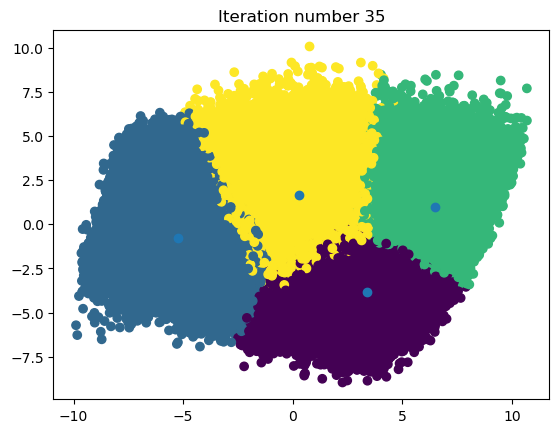

In [82]:
max_iterations = 150
k=4 #number of clusters 

centroids = random_centroids(data, k) #random initialisation
old_centroids = pd.DataFrame()
iteration = 1

#if old centroids become equal to new ones, it means they've stopped shifting,so stop

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids) #which cluster each datapoint goes into
    centroids = new_centroids(data, labels, k) #update centroid value
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

# Interpretting the output

In [73]:
centroids #0-more humid,more rainfall,less temp,less sunshine
#1-high temp,sunny

,0,1,2,3
MinTemp,5.140037,6.401281,6.489225,4.142352
MaxTemp,3.921680,6.519567,5.713068,4.150037
Rainfall,1.142250,1.009365,1.061793,1.029589
Evaporation,1.369838,1.929082,1.689136,1.376895
Sunshine,2.684629,8.134071,6.182708,6.802231
WindGustSpeed,3.340113,3.449257,3.481080,2.948085
WindSpeed3pm,3.090832,3.225577,3.403865,2.884089
Humidity9am,8.009710,5.032342,6.551700,6.960088
Humidity3pm,6.811001,3.471233,5.074189,4.797212
Pressure9am,6.423437,6.236520,6.125194,7.265024


In [70]:
labels.value_counts()

0    18702
2    17235
1    11279
3    11049
dtype: int64

In [71]:
weather[labels == 3]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6163,2009-04-25,Cobar,12.7,23.4,0.6,5.0,10.6,NW,46.0,WSW,...,64.0,36.0,1010.3,1006.0,1.0,5.0,17.1,21.9,No,No
6164,2009-04-26,Cobar,11.2,18.4,1.0,5.6,9.0,WNW,63.0,WSW,...,54.0,37.0,1011.1,1010.7,1.0,6.0,13.1,16.5,No,No
6165,2009-04-27,Cobar,5.7,19.7,0.0,4.8,10.3,WSW,52.0,WSW,...,58.0,34.0,1017.7,1015.2,0.0,1.0,12.6,18.8,No,No
6170,2009-05-02,Cobar,6.6,20.6,0.0,2.4,10.6,S,28.0,SE,...,39.0,29.0,1025.6,1022.5,0.0,1.0,15.2,19.8,No,No
6171,2009-05-03,Cobar,7.5,22.8,0.0,4.2,10.7,ESE,30.0,SE,...,54.0,22.0,1026.0,1023.5,0.0,1.0,14.8,21.9,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138444,2015-08-29,AliceSprings,4.1,23.5,0.0,5.6,11.4,E,31.0,E,...,28.0,18.0,1024.3,1020.2,1.0,0.0,14.7,22.0,No,No
138449,2015-09-03,AliceSprings,3.9,21.3,0.0,8.0,11.3,ESE,37.0,SSE,...,37.0,40.0,1024.0,1020.2,0.0,0.0,12.8,19.3,No,No
138450,2015-09-04,AliceSprings,4.2,25.0,0.0,7.0,11.0,ESE,30.0,ESE,...,43.0,23.0,1024.5,1020.0,0.0,0.0,14.0,22.6,No,No
138455,2015-09-09,AliceSprings,2.4,23.2,0.0,7.2,11.4,E,37.0,ESE,...,30.0,11.0,1028.9,1024.6,0.0,0.0,14.3,22.3,No,No


In [72]:
weather[labels == 2][["Location"] + features]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6055,Cobar,27.1,36.1,0.0,13.0,0.0,43.0,20.0,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3
6063,Cobar,25.2,40.5,0.0,16.4,10.3,44.0,22.0,24.0,15.0,1012.4,1009.0,4.0,6.0,31.4,37.8
6067,Cobar,21.4,37.5,0.0,14.8,6.9,43.0,9.0,34.0,29.0,1013.1,1009.6,7.0,6.0,26.2,34.1
6069,Cobar,25.4,33.5,0.0,13.6,3.7,46.0,28.0,46.0,52.0,1012.0,1009.8,4.0,7.0,28.9,29.7
6070,Cobar,21.8,30.7,0.0,8.0,5.9,56.0,19.0,71.0,63.0,1008.6,1006.2,7.0,7.0,24.4,27.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142283,Darwin,23.3,32.4,0.0,5.4,8.9,43.0,24.0,66.0,32.0,1014.5,1011.1,3.0,3.0,25.6,32.1
142287,Darwin,20.6,29.4,0.0,10.6,5.4,46.0,22.0,46.0,26.0,1016.5,1013.0,7.0,5.0,21.6,28.5
142288,Darwin,18.7,29.4,0.0,7.8,8.7,48.0,17.0,29.0,24.0,1017.1,1013.5,7.0,7.0,20.9,28.5
142299,Darwin,21.2,32.6,0.0,7.6,8.6,37.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0


# Choosing the right k value(Elbow method)

In [75]:
#elbow method or silhouette method
import sklearn.cluster as cluster

In [83]:
#WSS = Within-Cluster-Sum of Squared
K = range(1,15)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")#init=k-means++ chooses centroids
    kmeans=kmeans.fit(data)
    wss_iter = kmeans.inertia_ #stores each iter values of wss
    wss.append(wss_iter)
    
centers = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
centers

,Clusters,WSS
0,1,2.428518e+06
1,2,1.531611e+06
2,3,1.317763e+06
3,4,1.144735e+06
4,5,1.053298e+06
5,6,9.736183e+05
6,7,9.133679e+05
7,8,8.664483e+05
8,9,8.292806e+05
9,10,7.975786e+05


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

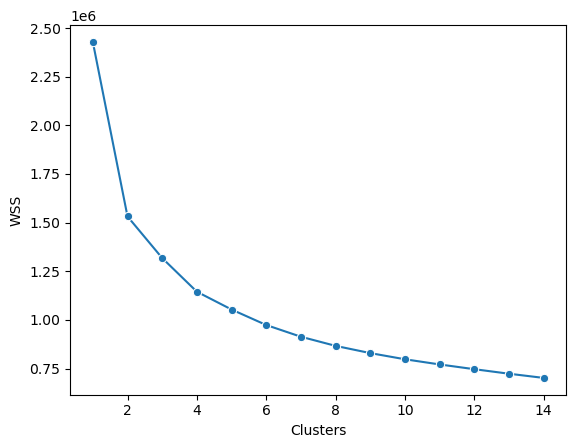

In [87]:
import seaborn as sns
sns.lineplot(x = 'Clusters', y = 'WSS', data = centers, marker="o")

The elbow is at k=4. WSS value not rapid after k=4. Hence k=4 (4 clusters)